In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
songs_id = pd.read_csv("kaggle_songs.txt", sep=" ", header= None)

In [37]:
users_id = pd.read_csv("kaggle_users.txt", sep=" ", header= None)

In [38]:
evaluation = pd.read_csv("kaggle_visible_evaluation_triplets.txt" , sep="\t", header= None)

In [39]:
songs_id[songs_id.columns[1]] = "song_id_"+(songs_id[songs_id.columns[1]]-1).astype(str)
songs_id

,0,1
0,SOAAADD12AB018A9DD,song_id_0
1,SOAAADE12A6D4F80CC,song_id_1
2,SOAAADF12A8C13DF62,song_id_2
3,SOAAADZ12A8C1334FB,song_id_3
4,SOAAAFI12A6D4F9C66,song_id_4
5,SOAAAGK12AB0189572,song_id_5
6,SOAAAGN12AB017D672,song_id_6
7,SOAAAGO12A67AE0A0E,song_id_7
8,SOAAAGP12A6D4F7D1C,song_id_8
9,SOAAAGQ12A8C1420C8,song_id_9


In [6]:
users_id["user_id"] = range(110000)

In [7]:
users_id.user_id = "user_id_" + users_id.user_id.astype(str)

In [8]:
rel = pd.merge(evaluation,songs_id,how='left',left_on=evaluation.columns[1], right_on=songs_id.columns[0])

In [9]:
rel1 = pd.merge(rel, users_id, how='left', left_on=rel.columns[1],right_on=users_id[0])

In [47]:
rel2 = rel1[rel1.columns[[7,5,3]]]

In [48]:
rel2 = rel2.rename(columns={rel2.columns[1]:'song_id',rel2.columns[2]:'number'})

In [49]:
rel2['song_id'] = rel2.song_id.str.split('_').str.get(-1).astype(int)

/home/yuxiang/anaconda2/lib/python2.7/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


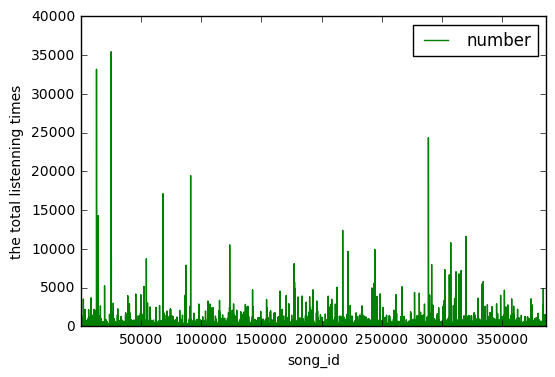

In [100]:
rel2.groupby('song_id').sum().plot(colors='green')
plt.ylabel('the total listenning times')
plt.show()

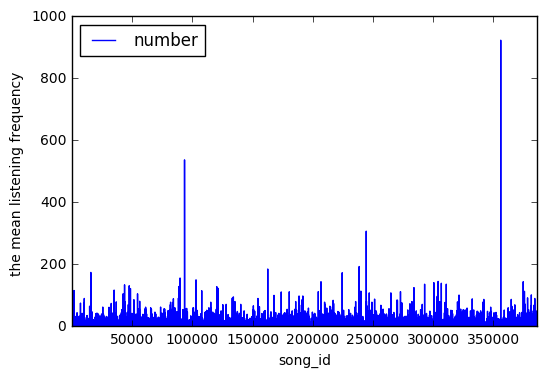

In [97]:
rel2.groupby('song_id').mean().plot()
plt.ylabel('the mean listening frequency ')
plt.show()

In [74]:
sorted(rel2.groupby('song_id').sum().number,reverse=True)

[35432,
 33179,
 24359,
 19454,
 17115,
 14279,
 12392,
 11610,
 10794,
 10515,
 9921,
 9685,
 8972,
 8718,
 8093,
 7969,
 7895,
 7331,
 7210,
 7052,
 6778,
 6651,
 5781,
 5695,
 5562,
 5463,
 5238,
 5162,
 5119,
 5058,
 4995,
 4978,
 4957,
 4905,
 4862,
 4723,
 4720,
 4671,
 4561,
 4384,
 4287,
 4198,
 4184,
 4159,
 4115,
 4084,
 4048,
 4026,
 4010,
 3988,
 3964,
 3918,
 3911,
 3901,
 3879,
 3820,
 3798,
 3688,
 3648,
 3573,
 3560,
 3547,
 3537,
 3532,
 3506,
 3469,
 3355,
 3343,
 3329,
 3277,
 3275,
 3172,
 3129,
 3022,
 3002,
 3000,
 2982,
 2956,
 2924,
 2920,
 2908,
 2900,
 2896,
 2891,
 2884,
 2880,
 2866,
 2830,
 2793,
 2788,
 2771,
 2770,
 2765,
 2736,
 2689,
 2684,
 2677,
 2650,
 2646,
 2645,
 2640,
 2613,
 2607,
 2599,
 2598,
 2596,
 2566,
 2552,
 2535,
 2513,
 2513,
 2508,
 2506,
 2502,
 2495,
 2469,
 2461,
 2461,
 2433,
 2429,
 2407,
 2406,
 2404,
 2397,
 2389,
 2384,
 2361,
 2317,
 2296,
 2271,
 2263,
 2260,
 2215,
 2208,
 2190,
 2189,
 2189,
 2188,
 2178,
 2176,
 2164,
 20

In [15]:
for r in rel2.iterrows():
    ligne = int(r[1][0].split('_')[-1])
    col = int(r[1][1].split('_')[-1])
    number = r[1][2]
    M[ligne][col] = number

In [ ]:
u_average_ligne = np.mean(M, axis=1)

In [ ]:
u_average_col = np.mean(M, axis = 0)

In [16]:
M

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])